In [1]:
import sys
sys.path.append('/net/store/cogmod/users/xenohmer/PycharmProjects/perception_manipulation_LE/')
from communication_game.utils.plot_helpers import *
from communication_game.utils.similarity_analysis import *
import seaborn as sns
import matplotlib.pyplot as plt
import string
from utils.train import *
import utils

# Experiment 1: CNN similarities

### all conditions

In [2]:
cnn_keys = ['default0-0', 'color0-6', 'shape0-6', 'scale0-6', 'all0-8']

featurewise bias: penultimate layer

sim        color scale shape
default0-0 [0.234 0.023 0.004]

sim        color scale shape
color0-6 [ 0.507 -0.024 -0.024]

sim        color scale shape
shape0-6 [-0.015 -0.016  0.371]

sim        color scale shape
scale0-6 [-0.02   0.424 -0.021]

sim        color scale shape
all0-8 [0.081 0.056 0.074]

sim               color scale shape
all0-8 corrected [0.117 0.099 0.112]


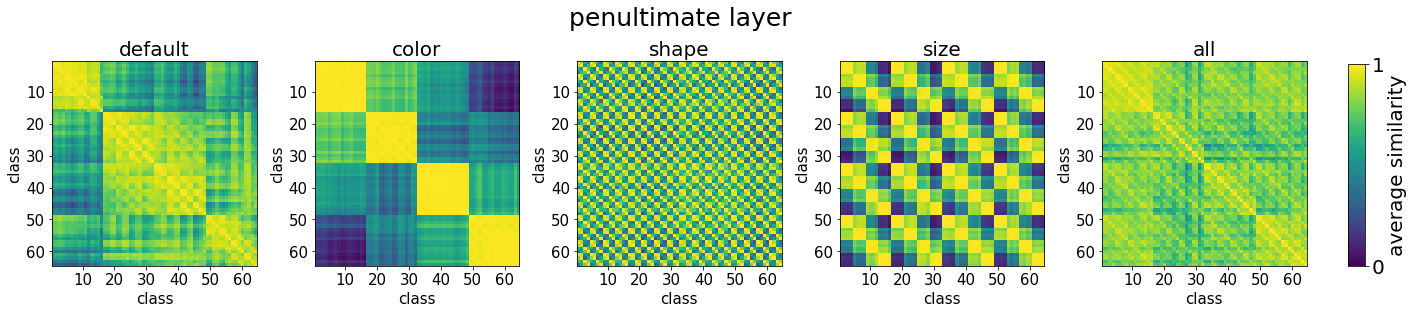



featurewise bias: ultimate layer

sim        color scale shape
default0-0 [0. 0. 0.]

sim        color scale shape
color0-6 [ 0.474 -0.016 -0.012]

sim        color scale shape
shape0-6 [-0.002 -0.01   0.392]

sim        color scale shape
scale0-6 [-0.007  0.386 -0.01 ]

sim        color scale shape
all0-8 [0.183 0.129 0.146]

sim               color scale shape
all0-8 corrected [0.248 0.207 0.221]


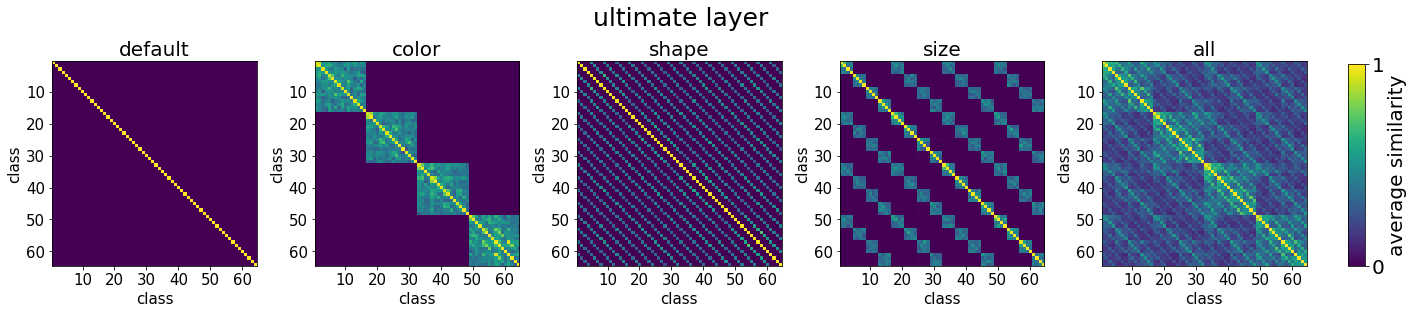

In [3]:
for l, layer in enumerate([1,0]):
    print("featurewise bias:", ['penultimate layer', 'ultimate layer'][l])
    SMs = show_vision_modules_similarities(cnn_keys, n_examples=100, plot=False, layer=layer)
    fig, axes = plt.subplots(1,len(cnn_keys),figsize=(23,4))
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(SMs[i], vmin=0., vmax=1.)
        ax.set_xlabel('class', fontsize=15)
        ax.set_ylabel('class', fontsize=15)
        ax.set_yticks([9,19,29,39,49,59])
        ax.set_yticklabels([10,20,30,40,50,60], fontsize=15)
        ax.set_xticks([9,19,29,39,49,59])
        ax.set_xticklabels([10,20,30,40,50,60], fontsize=15)
        if 'scale' in cnn_keys[i]:
            title = 'size'
        else: 
            title = cnn_keys[i][:-3]
        ax.set_title(title, fontsize=20)

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar = fig.add_axes([0.82, 0.18, 0.01, 0.7]) # x displace (right), y displace (up)
    cbar.tick_params(labelsize=20) 
    cbar.set_label('average similarity')
    cbarplot = fig.colorbar(im, cax=cbar, ticks=[0,1])
    cbarplot.set_label('average similarity', fontsize=20)
    plt.suptitle(['penultimate layer', 'ultimate layer'][l], fontsize=25, x=0.417, y=1.08)
    plt.show()
    print('\n')

### subset of conditions

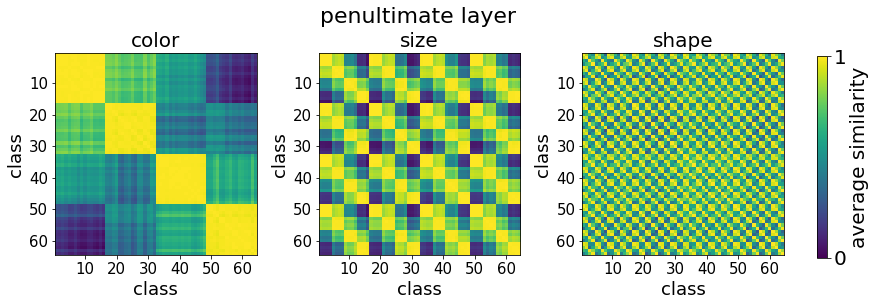

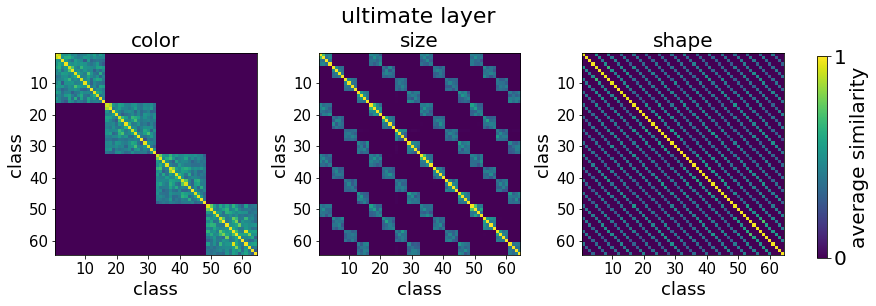

In [6]:
cnn_keys = ['color0-6', 'scale0-6', 'shape0-6']

for l, layer in enumerate([1,0]):
    SMs = show_vision_modules_similarities(cnn_keys, n_examples=100, plot=False, layer=layer, print_sim=False)
    fig, axes = plt.subplots(1,len(cnn_keys),figsize=(14,4))
    for i, ax in enumerate(axes.flat):
        im = ax.imshow(SMs[i], vmin=0., vmax=1.)
        ax.set_xlabel('class', fontsize=18)
        ax.set_ylabel('class', fontsize=18)
        ax.set_yticks([9,19,29,39,49,59])
        ax.set_yticklabels([10,20,30,40,50,60], fontsize=15)
        ax.set_xticks([9,19,29,39,49,59])
        ax.set_xticklabels([10,20,30,40,50,60], fontsize=15)
        if 'scale' in cnn_keys[i]:
            title = 'size'
        else: 
            title = cnn_keys[i][:-3]
        ax.set_title(title, fontsize=20)

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar = fig.add_axes([0.82, 0.18, 0.01, 0.7]) # x displace (right), y displace (up)
    cbar.tick_params(labelsize=20) 
    cbar.set_label('average similarity')
    cbarplot = fig.colorbar(im, cax=cbar, ticks=[0,1])
    cbarplot.set_label('average similarity', fontsize=20)
    plt.suptitle(['penultimate layer', 'ultimate layer'][l], fontsize=22, x=0.425, y=1.05)
    plt.show()
    print('\n')

# Experiment 2 & 3: Groundedness 

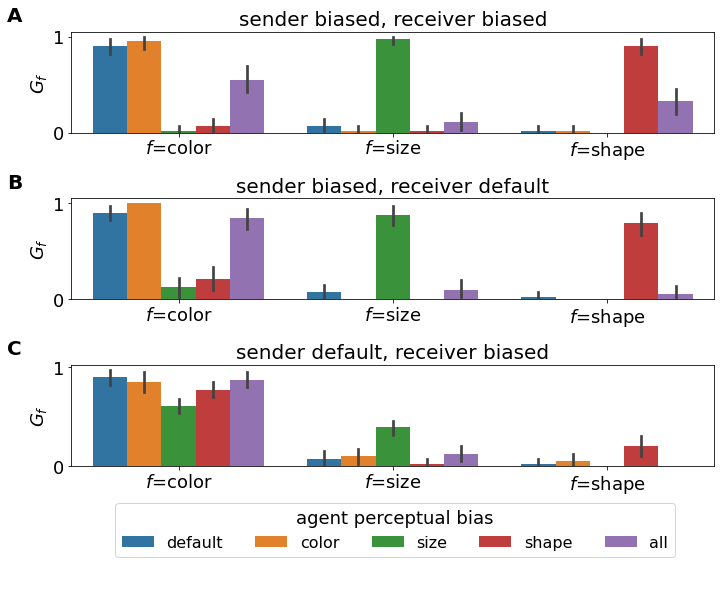

In [68]:
fig = plt.figure(figsize=(10,9))
vs = 4
ml = 3

runs = [['default', 'color','scale','shape','all'],
        ['default', 'color_default', 'scale_default','shape_default','all_default'],
        ['default', 'default_color','default_scale','default_shape','default_all']]

for r in range(len(runs)):
    plt.subplot(4,1,r+1)
    df = groundedness_dataframe(runs[r], vs, ml, n_runs=10, path='3Dshapes_subset/')
    ax = sns.barplot(x="feature", y="G_f", hue='bias', data=df)
    ax.set_xlabel('')
    ax.set_xticklabels(labels=['$f$=color', '$f$=size', '$f$=shape'])
    #ax.xaxis.label.set_size(18)
    ax.set_yticks(ticks=[0,1])
    ax.set_ylabel('$G_f$', fontsize=18)
    plt.legend([],[], frameon=False)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title='bias')
    plt.title(['sender biased, receiver biased',
               'sender biased, receiver default',
               'sender default, receiver biased'][r], fontsize=20)
    ax.text(-0.1, 1.1, string.ascii_uppercase[r], transform=ax.transAxes, 
            size=20, weight='bold')

    
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, loc=[0.16,0.075], ncol=5, fontsize=16, title='agent perceptual bias')
legend.get_title().set_fontsize('18')
plt.tight_layout()

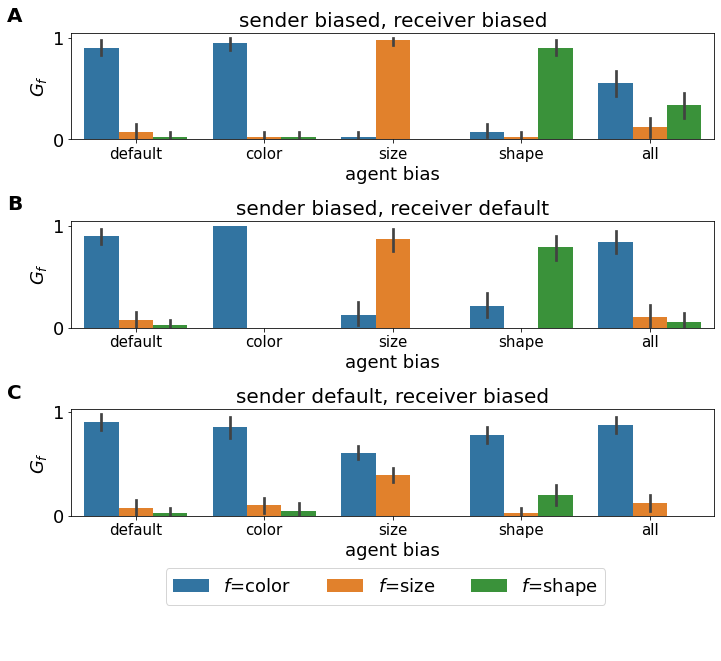

In [76]:
fig = plt.figure(figsize=(10,10))
vs = 4
ml = 3

runs = [['default', 'color','scale','shape','all'],
        ['default', 'color_default', 'scale_default','shape_default','all_default'],
        ['default', 'default_color','default_scale','default_shape','default_all']]

for r in range(len(runs)):
    plt.subplot(4,1,r+1)
    df = groundedness_dataframe(runs[r], vs, ml, n_runs=10, path='3Dshapes_subset/')
    ax = sns.barplot(x="bias", y="G_f", hue='feature', data=df)
    ax.set_xlabel('')
    ax.set_xlabel('agent bias', fontsize=18)
    #ax.xaxis.label.set_size(18)
    ax.set_xticklabels(labels=['default', 'color', 'size', 'shape', 'all'])
    ax.set_yticks(ticks=[0,1])
    ax.set_ylabel('$G_f$', fontsize=18)
    plt.legend([],[], frameon=False)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, title='bias')
    plt.title(['sender biased, receiver biased',
               'sender biased, receiver default',
               'sender default, receiver biased'][r], fontsize=20)
    ax.text(-0.1, 1.1, string.ascii_uppercase[r], transform=ax.transAxes, 
            size=20, weight='bold')

    
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, ['$f$=' + l for l in labels], loc=[0.23,0.085], ncol=5, fontsize=18)
#legend = fig.legend(handles, labels, loc=[0.34,0.07], ncol=5, fontsize=15, title='feature ($f$)')
#legend.get_title().set_fontsize('18')
plt.tight_layout()